# Define the system  

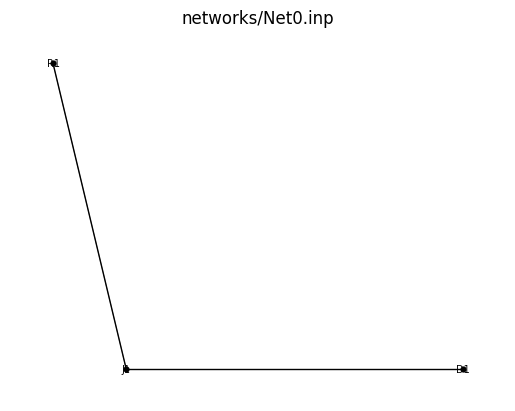

<Axes: title={'center': 'networks/Net0.inp'}>

In [1]:
import wntr
import wntr_quantum

# Create a water network model
inp_file = 'networks/Net0.inp'
inp_file = 'networks/Net2Loops.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)


## Run with the original Cholesky EPANET simulator

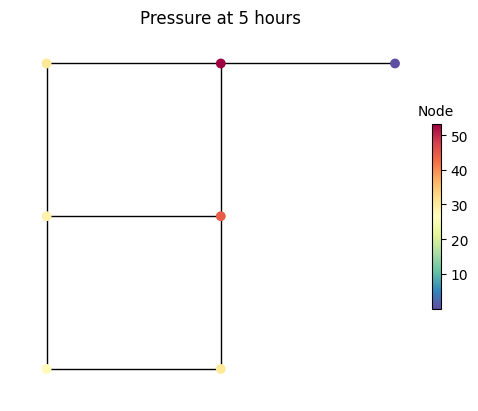

<Axes: title={'center': 'Pressure at 5 hours'}>

In [2]:
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

## Run with our custom Cholesky EPANET solver 
we use the default solver of the QuantumWNTRSimulator, that uses a LU solver, a s a benchmark of the calculation

/home/nico/QuantumApplicationLab/vitens/wntr-quantum/wntr_quantum/epanet/Linux/libepanet22_amd64.so


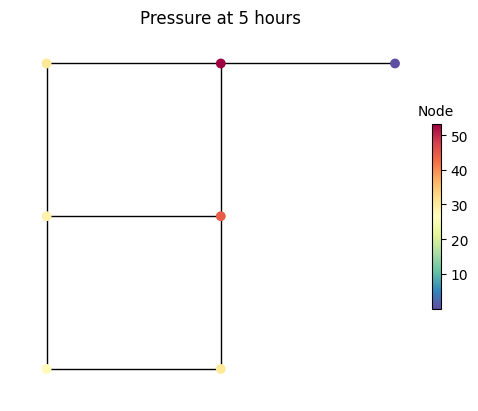

<Axes: title={'center': 'Pressure at 5 hours'}>

In [3]:
sim = wntr_quantum.sim.QuantumEpanetSimulator(wn)
results = sim.run_sim()
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

## Run with the AEQUBOLS solver

In [4]:
from quantum_newton_raphson.qubo_solver import QUBO_SOLVER

qubols_solver = QUBO_SOLVER(
    num_qbits=11,
    num_reads=250,
    # iterations=5,
    range=600,
    offset=250,
    # temperature=1e4,
    use_aequbols=False,
)

sim = wntr_quantum.sim.QuantumEpanetSimulator(wn, linear_solver=qubols_solver)
results = sim.run_sim(linear_solver=qubols_solver)

# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

/home/nico/QuantumApplicationLab/vitens/wntr-quantum/wntr_quantum/epanet/Linux/libepanet22_amd64.so
[655.27859238 667.59530792 674.04692082 680.49853372 664.07624633
 644.13489736]
[612.46334311 641.20234604 653.51906158 666.42228739 625.36656891
 588.41642229]
[613.63636364 641.20234604 653.51906158 666.42228739 623.60703812
 585.48387097]
[600.14662757 632.99120235 647.06744868 662.31671554 611.87683284
 569.06158358]
[615.39589443 643.5483871  655.86510264 668.18181818 624.78005865
 587.24340176]
[611.29032258 639.44281525 652.34604106 665.83577713 624.78005865
 587.82991202]
[624.78005865 653.51906158 663.48973607 672.87390029 639.44281525
 601.31964809]


In [1]:
import sys
import os 
epanet_path = os.environ["EPANET_QUANTUM"]
epanet_tmp = os.environ["EPANET_TMP"]
util_path = os.path.join(epanet_path, 'src/py/')
sys.path.append(util_path)
from quantum_linsolve import load_json_data 
A, b = load_json_data(os.path.join(epanet_tmp,'smat.json'))

In [10]:
from quantum_newton_raphson.qubo_solver import QUBO_SOLVER
linear_solver = QUBO_SOLVER(
    num_qbits=11,
    num_reads=500,
    # iterations=5,
    range=250,
    offset=650,
    # temperature=1e4,
    use_aequbols=False,
)

In [11]:
qubo_sol = linear_solver(A, b)

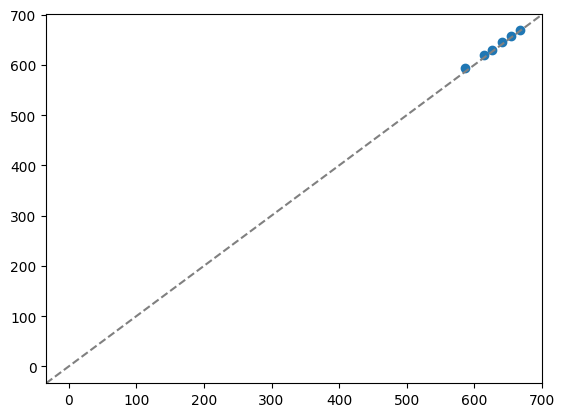

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
np_sol = np.linalg.solve(A.todense(), b)
plt.scatter(np_sol, qubo_sol.solution)
plt.axline((0, 0), slope=1, linestyle="--", color="gray")
plt.show()

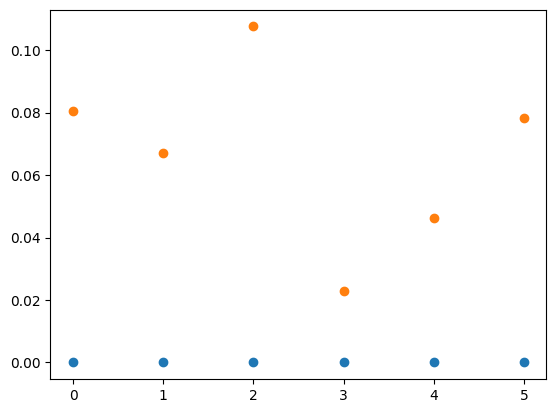

In [13]:
plt.scatter( list(range(6)), (A@np_sol-b))
plt.scatter(list(range(6)), (A@qubo_sol.solution-b))